In [3]:
###########################################################
# 데이터 전처리
###########################################################
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
train_datagen = ImageDataGenerator(rescale=1./255) # 모든 이미지를 1/255 로 스케일을 조정합니다
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "./datasets/train"
validation_dir = './datasets/validation'

train_generator = train_datagen.flow_from_directory( \
    train_dir, # 타깃 디렉터리
    target_size=(150, 150), # 모든 이미지를 150 × 150 크기
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


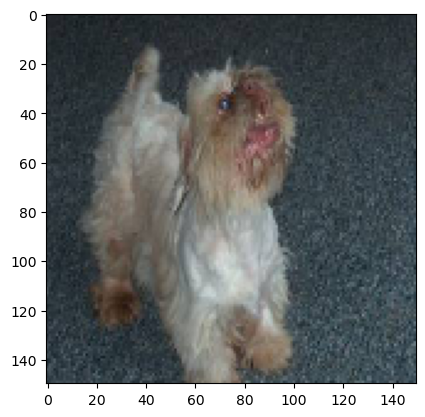

In [4]:
"제너레이터의 출력:  150 × 150  RGB "
"이미지의 배치((20, 150, 150, 3) 크기)와 이진 레이블의 배치((20,) 크기)  "
"각 배치에는 20개의 샘플(배치 크기)  "

for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)  #(20, 150, 150, 3)
    print('배치 레이블 크기:', labels_batch.shape) #(20,)
    break

import matplotlib.pyplot as plt
plt.imshow(  train_generator[0][0][0] )
plt.show()

In [5]:
###########################################################
# 학습
###########################################################
from k_cnn_n_cat_dog_model import makeModel
from tensorflow.keras.models import load_model

model =  makeModel()


# import os 
# if os.path.#TODO  ("k_model.h5") :
#     model = #TODO  ("k_model.h5")  
    
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100 ,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50)

model.save_weights("k_model.h5")

Epoch 1/15


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_14988\3947081954.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 32s 309ms/step - loss: 0.7069 - acc: 0.4835 - val_loss: 0.6915 - val_acc: 0.5470
Epoch 2/15
100/100 [==============================] - 31s 305ms/step - loss: 0.6885 - acc: 0.5625 - val_loss: 0.6752 - val_acc: 0.5040
Epoch 3/15
100/100 [==============================] - 31s 307ms/step - loss: 0.6638 - acc: 0.5950 - val_loss: 0.6116 - val_acc: 0.6760
Epoch 4/15
100/100 [==============================] - 31s 309ms/step - loss: 0.6247 - acc: 0.6575 - val_loss: 0.6013 - val_acc: 0.6640
Epoch 5/15
100/100 [==============================] - 31s 307ms/step - loss: 0.5725 - acc: 0.6905 - val_loss: 0.6046 - val_acc: 0.6870
Epoch 6/15
100/100 [==============================] - 32s 322ms/step - loss: 0.5402 - acc: 0.7260 - val_loss: 0.5901 - val_acc: 0.6740
Epoch 7/15
100/100 [==============================] - 31s 315ms/step - loss: 0.4933 - acc: 0.7555 - val_loss: 0.6656 - val_acc: 0.6930
Epoch 8/15
100/100 [==============================] - 31s 314ms/st

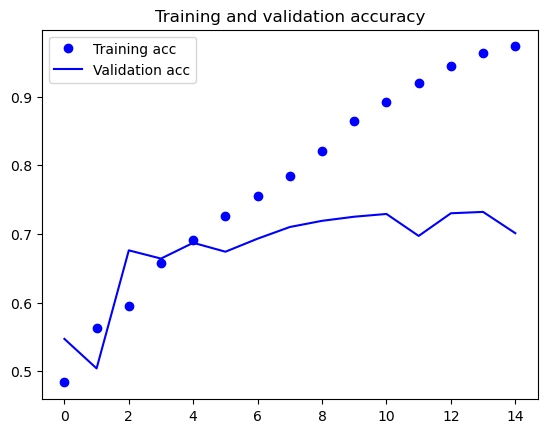

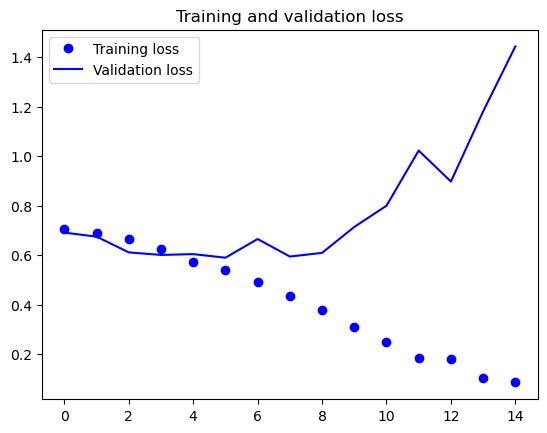

In [6]:
###########################################################
# 학습 결과 정확도 및 비용 그래프
###########################################################
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 114ms/step
[[0.00956885]]


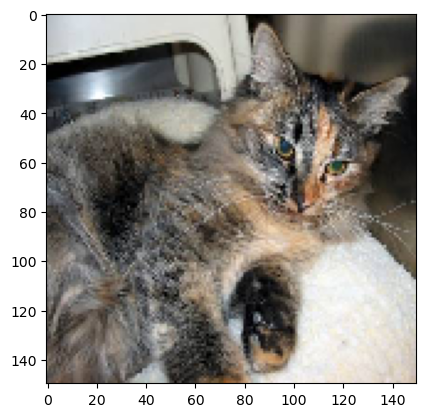

In [7]:
########################################################
import matplotlib.pyplot as plt 
print( model.predict( train_generator[10][0][0].reshape(-1,150,150,3) ))
plt.imshow(  train_generator[10][0][0]  )
plt.show()